0. This example file creates a Catalog object with series of events that 
   can be generated using the generate_draw module. 

In [1]:
## Necessary Components 
import numpy as np
import matplotlib.pyplot as plt
import os

import deepbench.module_data.generate_data as gdata


1. Create Individual Catalogs for Objects in Dataset
       Catalog(n_obj, n_pix_side, myclass,
               radius, amplitude,
               id_start=0, obj_params=None)
    Possible classes include 'star', 'galaxy', or 'lens'. 


In [2]:
n_galaxies = 3
img_dim = 256
galaxy_rads = np.random.uniform(20, 100, (n_galaxies, 1))
galaxy_amps = np.random.uniform(4.5, 8.5, (n_galaxies, 1))

#generate obj parameters if necessary (not for galaxy objects)
galaxy_catalog = gdata.Catalog(n_obj=n_galaxies, n_pix_side=img_dim,
                               myclass='galaxy', radius= galaxy_rads,
                               amplitude= galaxy_amps)
print('Number of Objects in galaxy_catalog: {}'.format(len(galaxy_catalog)))

n_stars = 3
img_dim = 256
rad_min, rad_max = 5, 20
amp_min, amp_max = 4.5, 8.5

star_rads = np.random.uniform(rad_min, rad_max, (n_stars, 1))
star_amps = np.random.uniform(amp_min, amp_max, (n_stars, 1))

#generate obj parameters if necessary (not for star objects)
star_catalog = gdata.Catalog(n_obj=n_stars, n_pix_side=img_dim, myclass='star', 
                             radius=star_rads, amplitude=star_amps)
print('Number of Objects in star_catalog: {}'.format(len(star_catalog)))

#Gravitational Lenses require obj_params initialization.
n_gravLens = 3
lens_params = []

for i in range(n_gravLens):
    #how many individual arcs comprise the grav lens
    num_arcs = np.random.randint(1, 7) 
    arc_list = []
    arc_rad = np.random.uniform(rad_max, 50)
    for j in range(num_arcs):
        width = np.random.uniform(0.8, 3.)
        theta1 = np.random.uniform(0., 360.)
        theta2 = np.random.uniform(theta1, theta1+360.)
        intensity = np.random.uniform(0.5, 1.3)
        arc = [arc_rad, width, theta1, theta2, intensity]
        arc_list.append(arc)
    lens_params.append(arc_list)

rad_min, rad_max = 5, 20
amp_min, amp_max = 4.5, 8.5

lens_rads = np.random.uniform(rad_min, rad_max, (n_gravLens, 1))
lens_amps = np.random.uniform(amp_min, amp_max, (n_gravLens, 1))


lens_catalog = gdata.Catalog(n_obj=n_gravLens, n_pix_side=img_dim, myclass='lens', 
                             radius=lens_rads, amplitude=lens_amps,
                             obj_params=lens_params)

print('Number of Objects in lens_catalog: {}'.format(len(lens_catalog)))

Number of Objects in galaxy_catalog: 3
Number of Objects in star_catalog: 3
Number of Objects in lens_catalog: 3


2. Combine the two datasets and write out the datafile. 

In [3]:
#Combine datasets
combined_catalog = gdata.concat_catalogs(lens_catalog, [star_catalog.data, galaxy_catalog.data])
print('Length of Combined Catalog: {}'.format(len(combined_catalog)))

#Write out information
file_dir = r"C:\Users\Tristan Paul Schefke\Desktop\Projects\DeepBench\examples\data\CatalogExample"
if not os.path.exists(file_dir):
    os.mkdir(file_dir)
file_name = "training_data.csv"
combined_catalog.to_csv(file_dir, file_name)

#generate images
combined_catalog.generate_imageset()
combined_catalog.save_images(file_dir)

Length of Combined Catalog: 9


C:\ProgramData\Anaconda3\envs\deepBench\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


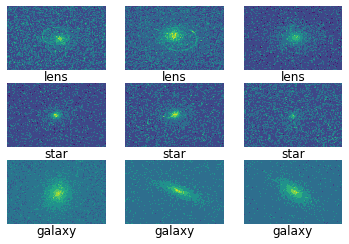

In [5]:
img = combined_catalog.images
labels = combined_catalog.data['myclass']
plt.subplot(3,3,1)
total_objs = n_galaxies + n_stars + n_gravLens
data = combined_catalog.get_data()
names = ['lens', 'lens', 'lens',
         'star', 'star', 'star',
         'galaxy', 'galaxy', 'galaxy']
for i in range(len(img)):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.contourf(img[i], cmap='viridis')
    plt.title(names[i], y = -0.25)
plt.savefig('example_Objects.jpg')
plt.show()

